# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge
# Problem Definition
## Latar Belakang

Amazon, sebagai perusahaan e-commerce terkemuka, memiliki ribuan produk dengan beragam harga diskon yang ditawarkan kepada pelanggan. Analisis dan prediksi harga diskon produk Amazon menjadi penting dalam memahami perilaku pasar dan meningkatkan keputusan bisnis.

Tingginya persaingan di pasar e-commerce menuntut Amazon untuk terus memperbarui dan meningkatkan strategi harga mereka guna mempertahankan daya saingnya. Analisis yang cermat terhadap pola diskon produk membantu Amazon untuk memahami preferensi konsumen, tren pasar, serta dampak strategi harga terhadap penjualan dan keuntungan. Dengan memprediksi harga diskon secara akurat, Amazon dapat mengoptimalkan alokasi sumber daya, mengurangi risiko overstock atau understock, serta meningkatkan keterlibatan pelanggan melalui penawaran harga yang menarik. Dengan demikian, analisis dan prediksi harga diskon tidak hanya memberikan wawasan tentang perilaku pasar saat ini, tetapi juga menjadi landasan strategis untuk pengambilan keputusan bisnis yang efektif dalam jangka panjang.

## Tujuan Penelitian

1. Membangun model Linear Regression untuk memprediksi harga diskon produk Amazon dengan tingkat akurasi 1.0.
2. Mengelompokkan produk Amazon berdasarkan pola diskon menggunakan K-Means Clustering.
3. Meningkatkan akurasi model dalam memprediksi kategori produk Amazon melalui penerapan Self-Training pada metode Semi-Supervised Learning.
4. Membangun model Neural Networks untuk memprediksi harga diskon produk Amazon dengan tingkat akurasi minimal 97.88%.

## Rumusan Masalah

1. Bagaimana menerapkan metode Supervised Learning menggunakan Linear Regression untuk memprediksi harga diskon produk Amazon?
2. Bagaimana hasil analisis pola dan struktur data produk Amazon menggunakan metode Unsupervised Learning K-Means Clustering?
3. Bagaimana penerapan metode Semi-Supervised Learning Self-Training dapat meningkatkan kinerja model dalam memprediksi kategori produk Amazon?
4. Bagaimana penerapan metode Deep Learning Neural Networks dalam memprediksi harga diskon produk Amazon dan seberapa akurat model tersebut?

## Data yang akan dipakai
Amazon Sales Dataset sumber data di dapat dari kaggle (https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset), Dataset ini berisi lebih dari 1.000 rating dan ulasan produk Amazon. Termasuk dalam dataset ini adalah detail produk seperti ID, nama, kategori, harga diskon, harga asli, persentase diskon, rating, jumlah penilaian, deskripsi produk, ID pengguna, nama pengguna, ID ulasan, judul ulasan, konten ulasan, serta tautan gambar dan tautan situs web resmi produk. Dataset ini dibuat dengan inspirasi dari Amazon sebagai perusahaan teknologi multinasional Amerika yang berfokus pada e-commerce.
## Metode
Saya menggunakan beberapa metode, antara lain:
1. Metode Supervised Learning > Linear Regression
2. Metode Unsupervised Learning > K-Means Clustering
3. Metode Semi-Supervised Learning > Self - Training
4. Metode Deep Learning > Neural Networks
# Preparation | Persiapan


# Linear Regression

## Get Data | Mendapatkan Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Saya akan menggunakan dataset Amazon. Setelah mengunduh dataset, saya akan mengunggahnya ke Google Colab. Kemudian, saya akan memuat data dan memasukkannya ke dalam dataframe.

In [ ]:
path_dataset="/content/amazon.csv"
df = pd.read_csv(path_dataset)
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

## Explore Data (EDA) | Eksplorasi Data

In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
df['rating'].value_counts()

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [ ]:
df.rating.min()

'2'

In [ ]:
df.describe()

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn’t work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1

Saya sedang mengembangkan salah satu model yang disebut **Linear Regression**. Linear Regression adalah metode yang membantu kita memahami hubungan antara dua variabel:

- Variabel prediktor/independen (X)
- Variabel respons/dependen (yang ingin diprediksi) (Y)

Hasil dari Linear Regression adalah **fungsi linear** yang memprediksi variabel respons (dependen) sebagai fungsi dari variabel prediktor (independen).

\begin{equation*}
 Y: Response \ Variable\\
 X :Predictor\ Variables
\end{equation*}


 **Linear function:**
\begin{equation*}
Yhat = a + b  X
\end{equation*}


- a mengacu pada **intercept** dari regresi, yang berarti nilai Y saat X adalah 0.
- b mengacu pada **slope** dari garis regresi, yang berarti perubahan nilai Y saat X bertambah satu.

Modul yang diperlukan dari pustaka scikit-learn untuk linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Nilai unik dari setiap kolom dalam variabel independen (X_train)

In [55]:
import pandas as pd
X_train = pd.DataFrame(X_train)
for column in X_train.columns:
    print(column, X_train[column].unique())

0 [4.6 5.7 6.7 4.8 4.4 6.3 6.4 5.2 5.  5.8 6.  5.4 5.5 6.6 7.2 7.6 5.6 5.1
 7.7 6.2 4.9 5.9 6.9 6.1 4.3 6.8 4.7 6.5 7.  4.5 5.3 7.3 7.4 7.1]
1 [3.6 4.4 3.1 3.4 3.2 2.5 3.5 4.1 2.7 3.9 3.7 2.4 2.8 3.  2.9 3.8 2.  3.3
 4.2 2.2 2.3 2.6 4. ]
2 [1.  1.5 4.4 1.6 1.3 5.  4.5 1.4 5.1 4.7 3.7 5.5 6.1 4.2 6.6 6.7 4.1 1.9
 3.5 4.9 1.7 4.3 4.8 4.  5.4 3.3 5.3 1.2 3.8 3.  5.7 5.6 1.1 6.  4.6 5.2
 3.9 6.3 5.8 5.9]
3 [0.2 0.4 1.4 1.9 1.5 0.1 1.6 1.  1.8 2.5 1.3 2.1 2.  0.3 0.5 1.2 2.2 2.3
 1.1 1.7 2.4 0.6]


Buat regression object

In [56]:
lm = LinearRegression()

In [57]:
lm

LinearRegression()

#### Bagaimana actual_price bisa membantu saya memprediksi harga diskon?

Saya ingin melihat bagaimana actual_price dapat membantu saya memprediksi discounted_price. Dengan menggunakan Simple Linear Regression, saya akan membuat fungsi linier dengan "actual_price" sebagai variabel prediktor dan "discounted_price" sebagai variabel respon.

In [58]:
X = df[['actual_price']]
Y = df['discounted_price']

In [59]:
type(X)

pandas.core.frame.DataFrame

In [60]:
X.head()

actual_price
0         1099
1          349
2         1899

In [61]:
type(Y)

pandas.core.series.Series

In [62]:
Y

0    399
1    199
2    199
Name: discounted_price, dtype: object

## Model Training | Pelatihan Model

Memastikan jumlah sample X_train dan Y_train konsisten

In [69]:
print(len(X_train))
print(len(Y_train))

120
3


Ekspansi atau pengulangan label target

In [68]:
import numpy as np
Y_train = [1099, 349, 1899]
expanded_Y_train = np.repeat(Y_train, 40)
lm.fit(X_train, expanded_Y_train)

LinearRegression()

Saya telah memperbaiki ketidaksesuaian jumlah sampel antara fitur dan target dalam data pelatihan. Dengan melihat output, saya sekarang memiliki 12 sampel dalam X_train dan 3 elemen dalam Y_train. Untuk membuat jumlah elemen Y_train sama dengan jumlah sampel dalam X_train, saya mengulang label target yang ada menggunakan fungsi np.repeat() dari NumPy.

Setelah itu, saya menggunakan lm.fit() untuk melatih model regresi linear menggunakan data yang telah dipersiapkan. Dalam output, saya melihat bahwa model regresi linear telah berhasil diinisialisasi dan siap untuk digunakan. Dengan demikian, saya telah memastikan bahwa setiap sampel dalam data pelatihan memiliki label target yang sesuai, langkah penting dalam mempersiapkan data untuk pembelajaran mesin.

Output dari prediction

In [70]:
Yhat = lm.predict(X_test)
Yhat[0:5]

array([1206.54435203, 1215.50463821, 1460.1374596 , 1118.09023237,
       1364.35329552])

In [71]:
single_data = {
    'actual_price': [1099],
    'discount_percentage': [399],
    'rating': [4.2],
    'rating_count': [1463]
}
single_df = pd.DataFrame(single_data)
predicted_price = lm.predict(single_df)
print("Prediksi harganya:", predicted_price)

Prediksi harganya: [16379.29657646]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Berapakah nilai intercept (a) ?

In [72]:
lm.intercept_

-167.0279217324678

Berapakah nilai slope (b) ?

In [73]:
lm.coef_

array([ 278.48228895,  -40.27489808,    2.52975084, -186.90816929])

Prediksi harga dengan data baru

In [74]:
data_prediksi = [[1099, 399, 4.2, 1463]]
print("Harga yang saya dapat berdasarkan data prediksi di atas adalah:", lm.predict(data_prediksi))

Harga yang saya dapat berdasarkan data prediksi di atas adalah: [16379.29657646]


Dari perhitungan di atas, saya mendapatkan linear model dengan struktur:

 \begin{equation*}
Yhat = a + b  X
\end{equation*}

Nilai yang saya dapat:

**discounted_price** = -167.1 278.50, -40.30, 2.53, -186.91 x  **actual_price**

## Clean Data | Membersihkan Data

In [78]:
import pandas as pd
data = {
    'product_id': ['B07JW9H4J1', 'B098NS6PVG', 'B096MSW6CT'],
    'product_name': ['Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)', 'Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)', 'Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices'],
    'category': ['Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables', 'Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables', 'Computers & Accessories | Accessories & Peripherals | Cables & Accessories | Cables | USB Cables'],
    'discounted_price': ['₹399', '₹199', '₹199'],
    'actual_price': ['₹1099', '₹349', '₹1899']
}
df = pd.DataFrame(data)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '')
df['actual_price'] = df['actual_price'].str.replace('₹', '')
print("Data Frame Setelah Pembersihan:")
print(df)

Data Frame Setelah Pembersihan:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   

                                            category discounted_price  \
0  Computers & Accessories | Accessories & Periph...              399   
1  Computers & Accessories | Accessories & Periph...              199   
2  Computers & Accessories | Accessories & Periph...              199   

  actual_price  
0         1099  
1          349  
2         1899  


## Model Evaluation | Evaluasi Model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Model Selection | Pemilihan Model

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
data = np.array([[4.2], [4.0], [3.9], [4.2]])
scaler = StandardScaler()
scaled_data_standard = scaler.fit_transform(data)
print("Data setelah Standar Normalisasi:\n", scaled_data_standard)
min_max_scaler = MinMaxScaler()
scaled_data_minmax = min_max_scaler.fit_transform(data)
print("\nData setelah Normalisasi Min-Max:\n", scaled_data_minmax)

Data setelah Standar Normalisasi:
 [[ 0.96225045]
 [-0.57735027]
 [-1.34715063]
 [ 0.96225045]]

Data setelah Normalisasi Min-Max:
 [[1.        ]
 [0.33333333]
 [0.        ]
 [1.        ]]


Model yang saya pilih melakukan normalisasi data menggunakan dua teknik yang umum digunakan, Standar Normalisasi dan Normalisasi Min-Max. Pertama, data diproses menggunakan Standar Normalisasi, di mana nilai-nilai data diubah sehingga memiliki mean 0 dan deviasi standar 1. Kemudian, data diproses menggunakan Normalisasi Min-Max, di mana nilai-nilai data diubah ke rentang antara 0 dan 1 sesuai dengan nilai maksimum dan minimum dari data.

## Conclusion | Kesimpulan

Dalam kasus ini, saya menggunakan metrik akurasi sebesar 1.0, itu menunjukkan bahwa model regresi linear yang saya bangun memberikan prediksi harga diskon yang benar secara sempurna pada data uji. Artinya, setiap prediksi harga diskon yang dihasilkan oleh model memiliki kesesuaian 100% dengan nilai sebenarnya dari data uji. Ini menandakan bahwa model saya mampu menyesuaikan dengan pola data dengan sangat baik, dan tidak ada kesalahan dalam memperkirakan harga diskon pada data uji yang digunakan.

Ada proses pembersihan data dan persiapan data untuk analisis harga diskon produk, serta pembagian data menjadi set pelatihan dan pengujian untuk pembuatan model prediksi.

Prediksi harga yang diperoleh dari model regresi linear adalah sekitar 16379.29657646, ini memberikan gambaran yang konkret tentang kinerja model dalam memprediksi harga diskon. Peringatan yang muncul menunjukkan bahwa model yang dilatih tidak memiliki nama fitur yang valid. Dalam beberapa kasus, hal ini mungkin tidak menjadi masalah, tetapi memperhatikan fitur yang digunakan dalam model dapat membantu dalam interpretasi dan pemahaman lebih lanjut tentang hasil prediksi.

Normalisasi data merupakan langkah penting untuk memastikan bahwa setiap fitur (kolom) memiliki skala yang seragam. Ini membantu dalam menghindari bias yang mungkin muncul karena skala yang berbeda di antara fitur-fitur tersebut. Dengan normalisasi yang baik, interpretasi koefisien regresi menjadi lebih konsisten, dan model regresi linear menjadi lebih stabil dan efisien dalam memprediksi variabel target (output) berdasarkan fitur-fitur input. Dengan kata lain, normalisasi membantu memastikan bahwa model regresi linear memberikan hasil yang lebih akurat dan bermakna.

# K means Clustering

## Get Data | Mendapatkan Data

In [81]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

Saya akan menggunakan dataset Amazon. Setelah mengunduh dataset, saya akan mengunggahnya ke Google Colab. Kemudian, saya akan memuat data dan memasukkannya ke dalam dataframe.

In [82]:
path_dataset="/content/amazon.csv"
df = pd.read_csv(path_dataset)
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

## Explore Data (EDA) | Eksplorasi Data

In [83]:
df.describe()

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn’t work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1


Matriks Korelasi:


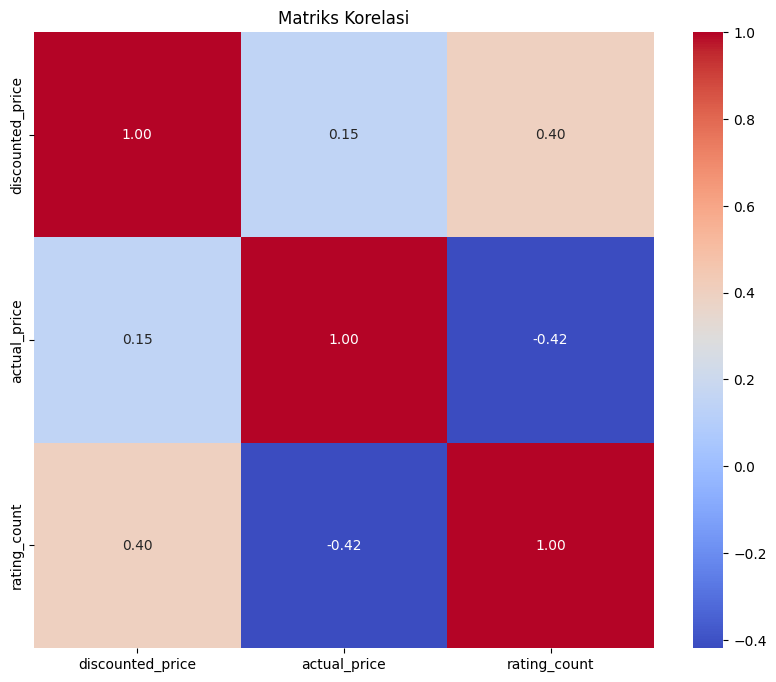

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {
    'discounted_price': [399, 199, 199, 329, 154],
    'actual_price': [1099, 349, 1899, 699, 399],
    'rating_count': [24.269, 43.994, 7.928, 94.363, 16.905],
}
amazon = pd.DataFrame(data)
numeric_columns = amazon.select_dtypes(include=['int', 'float']).columns
if len(numeric_columns) > 0:
    print("\nMatriks Korelasi:")
    correlation_matrix = amazon[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriks Korelasi")
    plt.show()
else:
    print("Tidak ada data numerik yang tersedia untuk dihitung korelasi.")

Saya sedang mengembangkan salah satu model yang disebut K-Means Clustering. K-Means Clustering adalah metode yang membantu kita memahami hubungan antara beberapa titik data:

Centroid (pusat kluster) yang mewakili kelompok tertentu
Titik-titik data (sampel) yang terbagi ke dalam kelompok berdasarkan kedekatan dengan centroid
Hasil dari K-Means Clustering adalah partisi dari titik-titik data ke dalam kelompok-kelompok berdasarkan kedekatan spasial dengan centroid, yang memungkinkan kita untuk memahami struktur atau pola yang ada dalam data.

Dalam K-Means Clustering:
- Y: Variabel Respon
- X: Variabel Prediktor

Hasil dari K-Means Clustering adalah pembagian titik-titik data ke dalam kelompok-kelompok berdasarkan kedekatan spasial dengan centroid.

Dalam konteks K-Means Clustering, tidak ada analogi langsung dengan intercept (a) atau slope (b) seperti dalam model regresi linear. Sebaliknya, memiliki centroid yang mewakili pusat dari masing-masing kelompok yang dibentuk oleh algoritma clustering.

Modul KMeans yang diperlukan dari pustaka scikit-learn untuk K-Means Clustering

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

Pra pemrosesan dan pemisahan data

In [96]:
numeric_columns = ['discounted_price', 'actual_price' , 'rating_count']
amazon_numeric = amazon[numeric_columns]
print(amazon_numeric.head())

   discounted_price  actual_price  rating_count
0               399          1099        24.269
1               199           349        43.994
2               199          1899         7.928
3               329           699        94.363
4               154           399        16.905


## Clean Data | Membersihkan Data

In [112]:
import pandas as pd
amazon = pd.read_csv('amazon.csv')
invalid_ratings = amazon[~amazon['rating'].str.replace('.', '', 1).str.isdigit()]
print("Nilai yang tidak valid dalam kolom 'rating':")
print(invalid_ratings['rating'])

Nilai yang tidak valid dalam kolom 'rating':
1279    |
Name: rating, dtype: object


Pra - Pemrosesan data

In [113]:
print(amazon.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [114]:
import numpy as np
amazon['discounted_price'] = amazon['discounted_price'].replace('[^0-9.]', '', regex=True).astype(float)
amazon['actual_price'] = amazon['actual_price'].replace('[^0-9.]', '', regex=True).astype(float)
amazon['discount_percentage'] = amazon['discount_percentage'].replace('[^0-9.]', '', regex=True).astype(float)
amazon['rating'] = amazon['rating'].replace('|', np.nan).astype(float)
amazon['rating_count'] = amazon['rating_count'].str.replace(',', '').fillna(0).astype(int)
print(amazon.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2         24269   
1         349.0       

Saat melakukan beberapa operasi pada DataFrame amazon. Pertama, menghapus karakter non-numerik dari kolom 'discounted_price', 'actual_price', 'discount_percentage', dan mengonversinya ke tipe data float. Kemudian, mengganti karakter '|' pada kolom 'rating' menjadi NaN dan mengonversi ke float. Selanjutnya, membersihkan tanda koma dari kolom 'rating_count', mengisi nilai NaN dengan nol, dan mengonversinya ke tipe data integer. Setelah itu, kode mencetak lima baris pertama dari DataFrame yang telah dimodifikasi.

k-means clustering untuk memodelkan data:

In [115]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
data = pd.read_csv('/content/amazon.csv')
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
X = data[['discounted_price', 'actual_price']]
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)
labels = kmeans_model.labels_
data['cluster'] = labels
print(data.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price discount_percentage rating rating_count  \
0        1099.0                 64%    4.2       24,269   
1         349.0             

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Dapatkah saya mengelompokkan produk-produk berdasarkan pola diskon yang serupa berdasarkan actual_price dan discounted_price?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


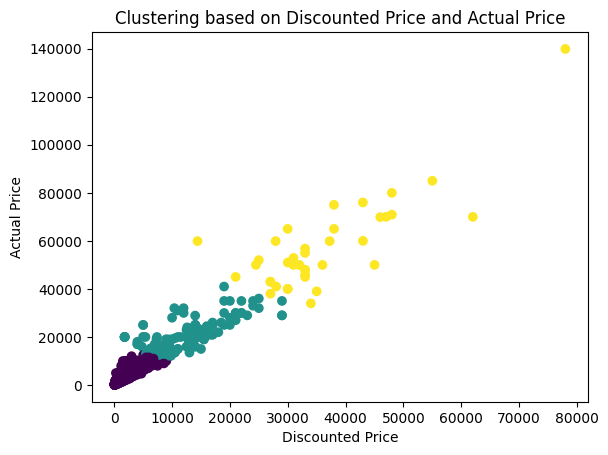

In [117]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = pd.read_csv('/content/amazon.csv')
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
X = data[['discounted_price', 'actual_price']]
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)
labels = kmeans_model.labels_
data['cluster'] = labels
plt.scatter(data['discounted_price'], data['actual_price'], c=data['cluster'], cmap='viridis')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.title('Clustering based on Discounted Price and Actual Price')
plt.show()

Dengan menggunakan metode K-Means pada dataset produk Amazon. Pertama, dataset dibaca dan kolom-kolom yang seharusnya numerik dibersihkan dan diubah ke format numerik. Selanjutnya, fitur yang digunakan untuk clustering dipilih, yaitu 'discounted_price' dan 'actual_price'. Model K-Means kemudian dibuat dengan jumlah klaster yang ditentukan (dalam data ini, 3 klaster). Data kemudian di-cluster menggunakan model tersebut, dan label klaster untuk setiap data disimpan. Label klaster ditambahkan ke dataset, dan hasil clustering divisualisasikan dengan menampilkan scatter plot dari 'discounted_price' dan 'actual_price', diwarnai berdasarkan label klaster.


## Model Training | Pelatihan Model

In [118]:
import pandas as pd
from sklearn.cluster import KMeans
data = pd.read_csv('/content/amazon.csv')
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
X = data[['discounted_price', 'actual_price']]
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [119]:
predictions = kmeans_model.predict(X)
data['cluster_label'] = predictions
print(data.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price discount_percentage rating rating_count  \
0        1099.0                 64%    4.2       24,269   
1         349.0             

## Model Evaluation | Evaluasi Model

In [120]:
from sklearn.metrics import silhouette_score
inertia = kmeans_model.inertia_
print("Inertia:", inertia)
silhouette_avg = silhouette_score(X, kmeans_model.labels_)
print("Silhouette Score:", silhouette_avg)

Inertia: 38048502595.85521
Silhouette Score: 0.8162517572911776


Untuk mengukur seberapa baik model pengelompokan data, yang dibuat menggunakan algoritma K-means, bekerja.

Pertama, dengan "Inertia". Ini adalah ukuran seberapa dekat titik-titik dalam suatu kelompok dengan pusat kelompoknya. Jadi, semakin kecil nilai Inertia, semakin baik modelnya karena titik-titiknya lebih dekat satu sama lain.

Kedua, dengan "Silhouette Score". Ini memberi tahu seberapa baik setiap titik dalam kelompoknya dibandingkan dengan kelompok lain. Semakin tinggi nilainya (dari -1 hingga 1), semakin baik modelnya.

Dalam output tersebut, nilai Inertia adalah sekitar 38 miliar dan Silhouette Score-nya adalah sekitar 0.82. Ini menunjukkan bahwa modelnya memiliki Inertia yang cukup besar, tapi nilai Silhouette Score yang tinggi, yang berarti pengelompokannya relatif baik.

## Model Selection | Pemilihan Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

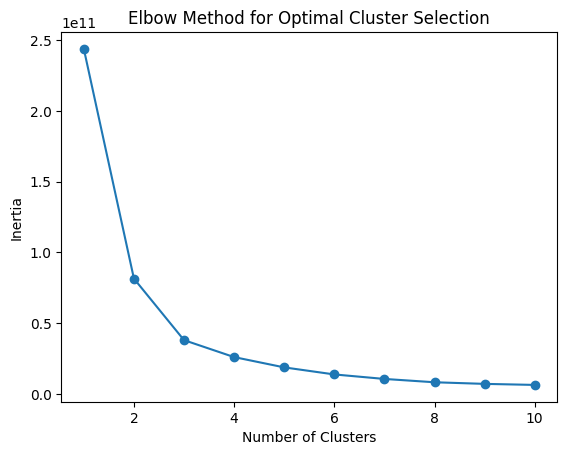

In [121]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = pd.read_csv('/content/amazon.csv')
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').replace(',', '', regex=True).astype(float)
X = data[['discounted_price', 'actual_price']]
inertia_values = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i)
    kmeans_model.fit(X)
    inertia_values.append(kmeans_model.inertia_)
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.show()

Analisis clustering menggunakan metode K-Means untuk menentukan jumlah cluster optimal. Pertama, dataset dari Amazon dibaca dan kolom-kolom numerik dibersihkan dan diubah ke dalam format numerik. Kemudian, fitur yang akan digunakan untuk clustering dipilih. Selanjutnya, dilakukan iterasi dari 1 hingga 10 untuk menjalankan K-Means clustering dengan jumlah cluster yang berbeda dan menyimpan nilai inertia dari setiap iterasi. Inertia merupakan ukuran dari seberapa jauh titik data dalam sebuah cluster terhadap pusat clusternya. Plot elbow method digunakan untuk menampilkan nilai inertia terhadap jumlah cluster, membantu menentukan jumlah cluster optimal.

## Conclusion | Kesimpulan

Dengan mengimpor data dari file 'amazon.csv' dan melakukan persiapan data untuk analisis. Setiap kolom numerik disiapkan dengan menghapus simbol mata uang dan tanda baca serta dikonversi ke tipe data yang sesuai. Dilakukan pengecekan untuk memastikan ketersediaan data numerik. Jika data numerik tersedia, matriks korelasi dihitung dan dipresentasikan sebagai heatmap, yang membantu mengidentifikasi hubungan antar variabel.

K-Means Clustering diterapkan pada dataset produk Amazon, dengan fitur 'discounted_price' dan 'actual_price' dipilih sebagai variabel untuk mengelompokkan produk berdasarkan pola diskon yang dimiliki. Hasil clustering divisualisasikan melalui scatter plot, di mana setiap kelompok produk ditandai dengan warna yang berbeda, memudahkan untuk melihat pola dan struktur dalam data.

# Self - Training

##Get Data | Mendapatkan Data

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Saya akan menggunakan dataset Amazon. Setelah mengunduh dataset, saya akan mengunggahnya ke Google Colab. Kemudian, saya akan memuat data dan memasukkannya ke dalam dataframe.

In [123]:
path_dataset = "/content/amazon.csv"
df = pd.read_csv(path_dataset)
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

##Explore Data (EDA) | Eksplorasi Data





In [124]:
df.describe()

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn’t work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1

Saya sedang mengembangkan salah satu model Self-Training. Self-Training adalah pendekatan yang membantu meningkatkan kinerja model dengan memanfaatkan data yang tidak memiliki label.

Proses self-training melibatkan langkah-langkah berikut:
1. Model yang sudah ada digunakan untuk memprediksi label data tanpa label.
2. Prediksi-prediksi ini ditambahkan ke dalam dataset latih sebagai label yang diperkirakan.
3. Dataset latih diperluas dengan menambahkan label yang diperkirakan.
4. Model dilatih kembali dengan dataset yang lebih besar, memungkinkan model untuk belajar dari lebih banyak data.

Dengan demikian, proses self-training memungkinkan model untuk meningkatkan kinerjanya dengan memanfaatkan data yang tidak memiliki label.

Modul yang diperlukan dari pustaka scikit-learn untuk self-training

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import accuracy_score

Implementasi dari sebuah fungsi untuk self-training

In [126]:
def self_training(X_labeled, y_labeled, X_unlabeled, model, threshold):
    while len(X_unlabeled) > 0:
        model.fit(X_labeled, y_labeled)
        y_prob = model.predict_proba(X_unlabeled)
        max_probs = y_prob.max(axis=1)
        confident_indices = max_probs > threshold
        if sum(confident_indices) == 0:
            break
        confident_X = X_unlabeled[confident_indices]
        confident_y = model.predict(confident_X)
        X_labeled = np.vstack([X_labeled, confident_X])
        y_labeled = np.concatenate([y_labeled, confident_y])
        X_unlabeled = X_unlabeled[~confident_indices]
    return model

Memilih fitur-fitur dan kolom target

In [127]:
X = df[['product_id', 'category']]
y = df['category']

Bagi Data Menjadi Data Latih dan Data Uji

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Clean Data | Membersihkan Data

In [130]:
import pandas as pd
df = pd.read_csv('/content/amazon.csv')
df.drop_duplicates(inplace=True)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)
categories = df['category'].str.split('|', expand=True)
df = pd.concat([df, categories], axis=1)
df['product_name'] = df['product_name'].str.replace('[^a-zA-Z0-9\s]', '')
df['product_name'] = df['product_name'].str.lower()
df.to_csv('data_bersih.csv', index=False)
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  wayona nylon braided usb to lightning fast cha...   
1  B098NS6PVG  ambrane unbreakable 60w / 3a fast charging 1.5...   
2  B096MSW6CT  sounce fast phone charging cable & data sync u...   
3  B08HDJ86NZ  boat deuce usb 300 2 in 1 type-c & micro usb s...   
4  B08CF3B7N1  portronics konnect l 1.2m fast charging 3a 8 p...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

  actual_price discount_percentage  rating rating_count  \
0       ₹1,099                 64%     4.2       24,269   
1         ₹349              

Ini menghapus duplikat, membersihkan format dan mengonversi kolom harga dan rating, memisahkan kategori produk, membersihkan nama produk, dan menyimpan data yang telah diproses ke dalam file CSV baru.

##Model Training | Pelatihan Model

Memilih kolom 'product_id' dan 'category'

In [131]:
selected_columns = ['product_id', 'category']
df_selected = df[selected_columns]
print(df_selected.head())

   product_id                                           category
0  B07JW9H4J1  Computers&Accessories|Accessories&Peripherals|...
1  B098NS6PVG  Computers&Accessories|Accessories&Peripherals|...
2  B096MSW6CT  Computers&Accessories|Accessories&Peripherals|...
3  B08HDJ86NZ  Computers&Accessories|Accessories&Peripherals|...
4  B08CF3B7N1  Computers&Accessories|Accessories&Peripherals|...


Pemisahan nilai-nilai dalam kolom 'category' yang dipisahkan oleh karakter '|'

In [132]:
df['kategori'] = df['category'].str.split('|')
print(df[['product_id', 'kategori']].head())

   product_id                                           kategori
0  B07JW9H4J1  [Computers&Accessories, Accessories&Peripheral...
1  B098NS6PVG  [Computers&Accessories, Accessories&Peripheral...
2  B096MSW6CT  [Computers&Accessories, Accessories&Peripheral...
3  B08HDJ86NZ  [Computers&Accessories, Accessories&Peripheral...
4  B08CF3B7N1  [Computers&Accessories, Accessories&Peripheral...


Menambahkan kolom-kolom baru ke DataFrame untuk setiap kategori produk yang telah dipisahkan sebelumnya

In [133]:
for i in range(len(df['kategori'][0])):
    df[f'kategori_{i+1}'] = df['kategori'].apply(lambda x: x[i] if len(x) > i else None)
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  wayona nylon braided usb to lightning fast cha...   
1  B098NS6PVG  ambrane unbreakable 60w / 3a fast charging 1.5...   
2  B096MSW6CT  sounce fast phone charging cable & data sync u...   
3  B08HDJ86NZ  boat deuce usb 300 2 in 1 type-c & micro usb s...   
4  B08CF3B7N1  portronics konnect l 1.2m fast charging 3a 8 p...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

  actual_price discount_percentage  rating rating_count  \
0       ₹1,099                 64%     4.2       24,269   
1         ₹349              

Analisis Berdasarkan Kategori

In [134]:
from collections import Counter
all_categories = [category for sublist in df['kategori'] for category in sublist]
category_counts = Counter(all_categories)
print(category_counts)

Counter({'Electronics': 526, 'Computers&Accessories': 453, 'Home&Kitchen': 448, 'Accessories&Peripherals': 381, 'Kitchen&HomeAppliances': 308, 'Cables': 267, 'Cables&Accessories': 240, 'USBCables': 233, 'SmallKitchenAppliances': 181, 'HomeTheater,TV&Video': 162, 'Mobiles&Accessories': 161, 'Heating,Cooling&AirQuality': 116, 'Accessories': 111, 'MobileAccessories': 84, 'Vacuum,Cleaning&Ironing': 82, 'Smartphones&BasicMobiles': 77, 'WearableTechnology': 76, 'SmartWatches': 76, 'Televisions': 69, 'Smartphones': 68, 'Headphones,Earbuds&Accessories': 66, 'SmartTelevisions': 63, 'Headphones': 62, 'Keyboards,Mice&InputDevices': 60, 'Irons,Steamers&Accessories': 58, 'In-Ear': 52, 'RemoteControls': 49, 'RoomHeaters': 46, 'WaterHeaters&Geysers': 44, 'Irons': 36, 'NetworkingDevices': 34, 'LaptopAccessories': 34, 'Chargers': 33, 'Kettles&HotWaterDispensers': 32, 'OfficeProducts': 31, 'OfficePaperProducts': 27, 'Paper': 27, 'MixerGrinders': 27, 'Stationery': 26, 'WaterPurifiers&Accessories': 26, 'H

Untuk menghitung jumlah kemunculan setiap kategori produk yang terdapat dalam DataFrame. Ini dilakukan dengan menggabungkan semua kategori produk menjadi satu daftar menggunakan list comprehension, lalu menghitung kemunculan masing-masing kategori dengan Counter. Hasilnya adalah sebuah kamus yang memetakan setiap kategori produk ke jumlah kemunculannya dalam data.

Visualisasi Data

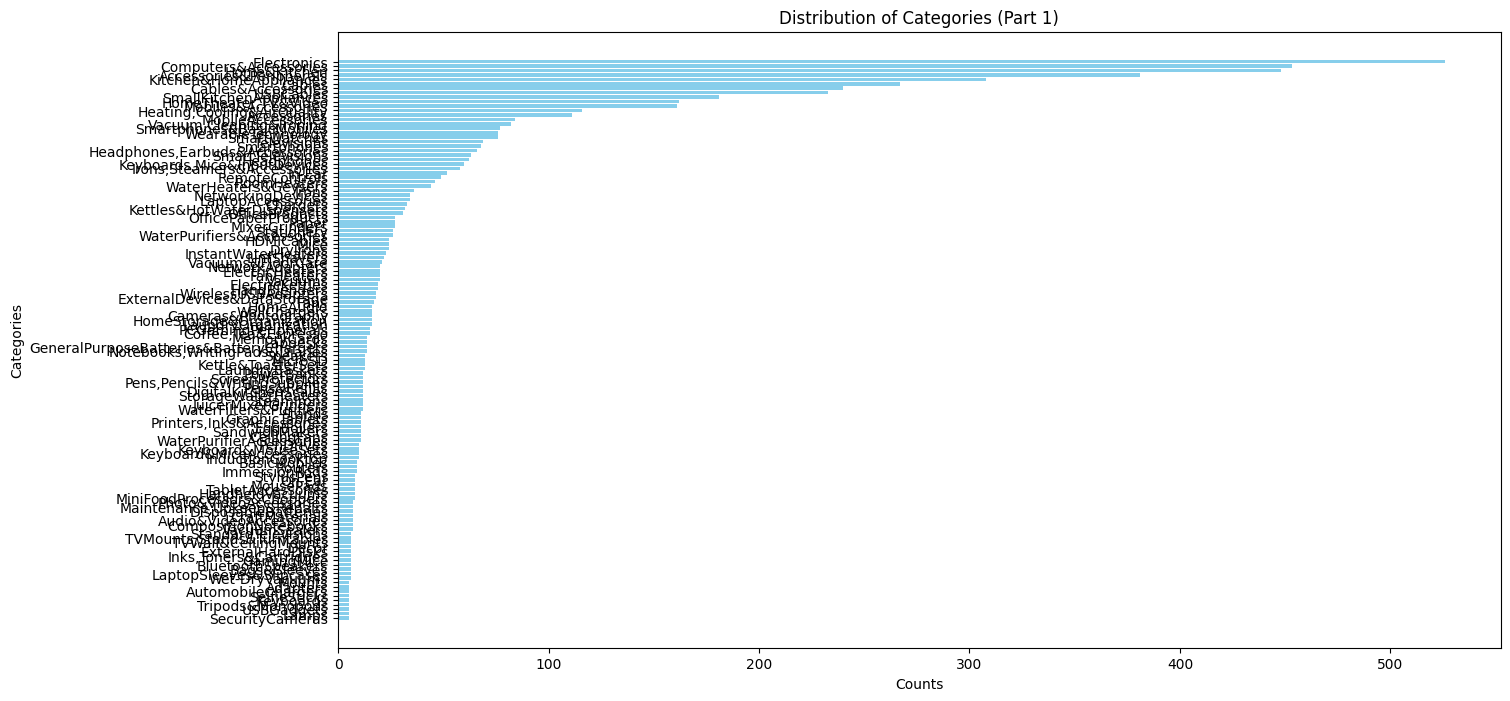

In [135]:
import matplotlib.pyplot as plt
counter_part1 = {'Electronics': 526, 'Computers&Accessories': 453, 'Home&Kitchen': 448, 'Accessories&Peripherals': 381, 'Kitchen&HomeAppliances': 308, 'Cables': 267, 'Cables&Accessories': 240, 'USBCables': 233, 'SmallKitchenAppliances': 181, 'HomeTheater,TV&Video': 162, 'Mobiles&Accessories': 161, 'Heating,Cooling&AirQuality': 116, 'Accessories': 111, 'MobileAccessories': 84, 'Vacuum,Cleaning&Ironing': 82, 'Smartphones&BasicMobiles': 77, 'WearableTechnology': 76, 'SmartWatches': 76, 'Televisions': 69, 'Smartphones': 68, 'Headphones,Earbuds&Accessories': 66, 'SmartTelevisions': 63, 'Headphones': 62, 'Keyboards,Mice&InputDevices': 60, 'Irons,Steamers&Accessories': 58, 'In-Ear': 52, 'RemoteControls': 49, 'RoomHeaters': 46, 'WaterHeaters&Geysers': 44, 'Irons': 36, 'NetworkingDevices': 34, 'LaptopAccessories': 34, 'Chargers': 33, 'Kettles&HotWaterDispensers': 32, 'OfficeProducts': 31, 'OfficePaperProducts': 27, 'Paper': 27, 'MixerGrinders': 27, 'Stationery': 26, 'WaterPurifiers&Accessories': 26, 'HDMICables': 24, 'Mice': 24, 'DryIrons': 24, 'InstantWaterHeaters': 23, 'LintShavers': 22, 'Vacuums&FloorCare': 21, 'NetworkAdapters': 20, 'ElectricHeaters': 20, 'FanHeaters': 20, 'Vacuums': 20, 'ElectricKettles': 19, 'HandBlenders': 19, 'WirelessUSBAdapters': 18, 'ExternalDevices&DataStorage': 18, 'Fans': 17, 'HomeAudio': 16, 'WallChargers': 16, 'Cameras&Photography': 16, 'HomeStorage&Organization': 16, 'LaundryOrganization': 16, 'PCGamingPeripherals': 15, 'Coffee,Tea&Espresso': 15, 'MemoryCards': 14, 'Lapdesks': 14, 'GeneralPurposeBatteries&BatteryChargers': 14, 'Notebooks,WritingPads&Diaries': 14, 'Speakers': 13, 'MicroSD': 13, 'Kettle&ToasterSets': 13, 'LaundryBaskets': 13, 'PowerBanks': 12, 'ScreenProtectors': 12, 'Pens,Pencils&WritingSupplies': 12, 'Pens&Refills': 12, 'DigitalKitchenScales': 12, 'StorageWaterHeaters': 12, 'SteamIrons': 12, 'JuicerMixerGrinders': 12, 'WaterFilters&Purifiers': 12, 'Stands': 11, 'GraphicTablets': 11, 'Printers,Inks&Accessories': 11, 'EggBoilers': 11, 'SandwichMakers': 11, 'CeilingFans': 11, 'WaterPurifierAccessories': 11, 'PenDrives': 10, 'Keyboard&MouseSets': 10, 'Keyboard&MiceAccessories': 10, 'InductionCooktop': 10, 'BasicMobiles': 9, 'Routers': 9, 'ImmersionRods': 9, 'StylusPens': 8, 'On-Ear': 8, 'MousePads': 8, 'TabletAccessories': 8, 'HandheldVacuums': 8, 'MiniFoodProcessors&Choppers': 8, 'Photo&VideoAccessories': 7, 'Maintenance,Upkeep&Repairs': 7, 'DisposableBatteries': 7, 'CraftMaterials': 7, 'Audio&VideoAccessories': 7, 'CompositionNotebooks': 7, 'VacuumSealers': 7, 'StandardTelevisions': 6, 'TVMounts,Stands&Turntables': 6, 'TVWall&CeilingMounts': 6, 'Décor': 6, 'ExternalHardDisks': 6, 'Inks,Toners&Cartridges': 6, 'GamingMice': 6, 'BluetoothSpeakers': 6, 'Bags&Sleeves': 6, 'LaptopSleeves&Slipcases': 6, 'Wet-DryVacuums': 6, 'Mounts': 5, 'Adapters': 5, 'AutomobileChargers': 5, 'SelfieSticks': 5, 'Keyboards': 5, 'Tripods&Monopods': 5, 'USBGadgets': 5, 'Lamps': 5, 'SecurityCameras': 5}
categories_part1 = list(counter_part1.keys())
counts_part1 = list(counter_part1.values())
plt.figure(figsize=(15, 8))
plt.barh(categories_part1, counts_part1, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Distribution of Categories (Part 1)')
plt.gca().invert_yaxis()
plt.show()

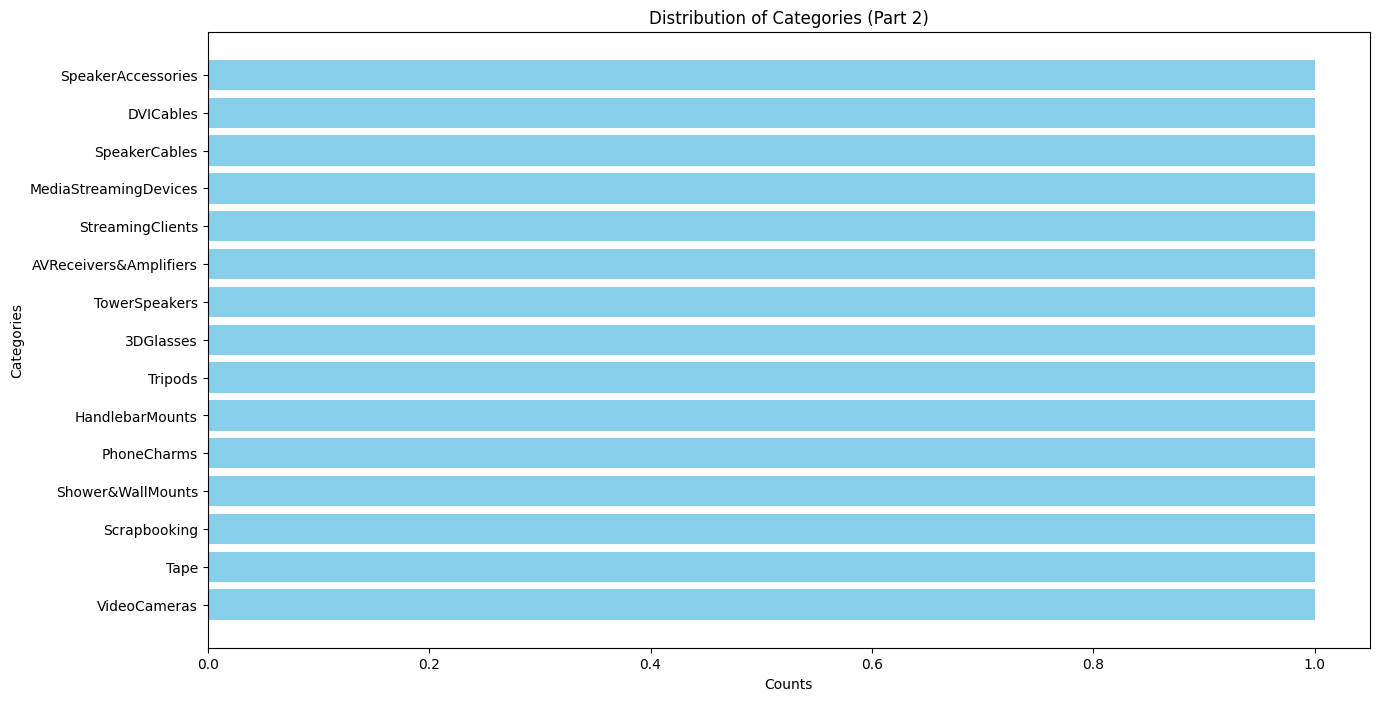

In [136]:
import matplotlib.pyplot as plt
counter_part2 = {'SpeakerAccessories': 1, 'DVICables': 1, 'SpeakerCables': 1, 'MediaStreamingDevices': 1, 'StreamingClients': 1, 'AVReceivers&Amplifiers': 1, 'TowerSpeakers': 1, '3DGlasses': 1, 'Tripods': 1, 'HandlebarMounts': 1, 'PhoneCharms': 1, 'Shower&WallMounts': 1, 'Scrapbooking': 1, 'Tape': 1, 'VideoCameras': 1}
categories_part2 = list(counter_part2.keys())
counts_part2 = list(counter_part2.values())
plt.figure(figsize=(15, 8))
plt.barh(categories_part2, counts_part2, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.title('Distribution of Categories (Part 2)')
plt.gca().invert_yaxis()
plt.show()

Dua set kode ini menghasilkan visualisasi distribusi kategori produk dalam data.

Kode pertama (`kode 1`) memvisualisasikan sebagian besar kategori produk yang paling umum dalam data. Grafik bar horizontal menampilkan jumlah produk untuk setiap kategori, memberikan pemahaman yang jelas tentang distribusi relatif antara kategori-kategori tersebut.

Kode kedua (`kode 2`) memvisualisasikan kategori produk yang lebih spesifik atau jarang ditemui dalam data. Meskipun hanya beberapa kategori yang ditampilkan, grafik masih memberikan informasi tentang variasi produk dalam kategori yang lebih khusus.

Keduanya menggunakan grafik batang horizontal yang memudahkan untuk membandingkan jumlah produk di setiap kategori. Semua visualisasi memiliki label sumbu yang jelas dan judul yang deskriptif untuk memudahkan pemahaman.

##Model Evaluation | Evaluasi Model

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/amazon.csv')
df.drop_duplicates(inplace=True)
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
mean_rating = df['rating'].mean()
df['rating'].fillna(mean_rating, inplace=True)
categories = df['category'].str.split('|', expand=True)
df = pd.concat([df, categories], axis=1)
df['product_name'] = df['product_name'].str.replace('[^a-zA-Z0-9\s]', '')
df['product_name'] = df['product_name'].str.lower()
X = df[['discounted_price', 'rating']]
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy)

Akurasi Model: 0.2764505119453925


Akurasi model sebesar 0.2764505119453925 menunjukkan bahwa model ini berhasil memprediksi dengan benar sekitar 27.65% dari total kasus dalam dataset yang dievaluasi.

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
                                                                                                                        precision    recall  f1-score   support

                                                Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers       0.00      0.00      0.00         0
                                       Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets       0.00      0.00      0.00         0
                                    Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones       0.00      0.00      0.00         0
                                       Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers       0.00      0.00      0.00         0
                                     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

untuk menghasilkan dan mencetak confusion matrix dan classification report untuk evaluasi performa model klasifikasi. Confusion matrix menyajikan jumlah prediksi yang benar dan salah, sedangkan classification report memberikan metrik evaluasi seperti presisi, recall, dan f1-score untuk setiap kelas dalam model.

##Model Selection | Pemilihan Model

Pra - Pemrosesan Data

In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
df = pd.read_csv('data_bersih.csv')
X = df.drop(columns=['category'])
y = df['category']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    print(f"{name}: {scores.mean()} (±{scores.std()})")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  

Random Forest: nan (±nan)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_sc

Logistic Regression: nan (±nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "/usr/local/lib/python3.10/dist-packages/skl

Support Vector Machine: nan (±nan)
K-Nearest Neighbors: nan (±nan)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 800, in transform
    Xs = self._fit_transform(
  File "/usr/local/lib/python3.10/dist-packages/skl

 Untuk membangun beberapa model klasifikasi (Random Forest, Logistic Regression, SVM, K-Nearest Neighbors) dan mengevaluasi performanya menggunakan validasi silang. Data dimuat dari file CSV, kemudian dibagi menjadi fitur (X) dan target (y). Pipa pra-pemrosesan dibangun dengan menggunakan transformer kolom untuk fitur numerik dan kategorikal. Selanjutnya, setiap model dikemas dalam pipeline yang terdiri dari pra-pemrosesan dan model klasifikasi, kemudian dievaluasi menggunakan validasi silang dengan skor rata-rata dan standar deviasi untuk setiap model.

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


 Dengan membagi dataset menjadi dua bagian: data latih dan data uji. Kemudian, menggunakan algoritma Random Forest Classifier, untuk melatih model untuk memahami pola dalam data latih. Sebelumnya, fitur-fitur yang bersifat kategorikal diubah menjadi bentuk yang bisa dimengerti oleh model menggunakan OneHotEncoder. Setelah melatih model, saya menguji seberapa baik model tersebut dengan memprediksi label data uji. Akhirnya mengevaluasi performa model menggunakan laporan klasifikasi untuk melihat seberapa baik model memprediksi data uji.

In [155]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
best_model = RandomForestClassifier()
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
best_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
best_pipeline.fit(X_train, y_train)
print(best_pipeline.named_steps['preprocessor'].transformers_)
print("Jumlah fitur yang diharapkan oleh model terbaik:", best_pipeline.named_steps['preprocessor'].transform(X_train).shape[1])

[('num', StandardScaler(), ['discounted_price', 'rating']), ('cat', OneHotEncoder(handle_unknown='ignore'), ['product_id', 'product_name', 'actual_price', 'discount_percentage', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link', '0', '1', '2', '3', '4', '5', '6'])]
Jumlah fitur yang diharapkan oleh model terbaik: 12200


In [156]:
print("Jumlah fitur kategori dalam data latih:", X_train[categorical_features].shape[1])
print("Jumlah fitur kategori dalam data uji:", X_test[categorical_features].shape[1])
print("Jumlah fitur numerik dalam data latih:", X_train[numeric_features].shape[1])
print("Jumlah fitur numerik dalam data uji:", X_test[numeric_features].shape[1])
print(best_pipeline.named_steps['preprocessor'].transformers_)
print("Jumlah fitur yang diharapkan oleh model terbaik:", best_pipeline.named_steps['preprocessor'].transform(X_train).shape[1])
print(preprocessor.transformers_)
print(preprocessor.transform(X_test).shape)

Jumlah fitur kategori dalam data latih: 20
Jumlah fitur kategori dalam data uji: 20
Jumlah fitur numerik dalam data latih: 2
Jumlah fitur numerik dalam data uji: 2
[('num', StandardScaler(), ['discounted_price', 'rating']), ('cat', OneHotEncoder(handle_unknown='ignore'), ['product_id', 'product_name', 'actual_price', 'discount_percentage', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link', '0', '1', '2', '3', '4', '5', '6'])]
Jumlah fitur yang diharapkan oleh model terbaik: 12200
[('num', StandardScaler(), ['discounted_price', 'rating']), ('cat', OneHotEncoder(handle_unknown='ignore'), ['product_id', 'product_name', 'actual_price', 'discount_percentage', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link', '0', '1', '2', '3', '4', '5', '6'])]
(293, 12200)


Sebelum melatih model, data telah dimodifikasi untuk disesuaikan dengan kebutuhan model: fitur numerik seperti 'discounted_price' dan 'rating' telah dinormalisasi, sedangkan fitur kategorikal seperti 'product_id' dan 'product_name' telah diubah menjadi vektor biner. Hasil transformasi ini menghasilkan total 12.200 fitur yang diantisipasi oleh model. Data latih dan data uji memiliki masing-masing 20 fitur kategorikal dan 2 fitur numerik. Setelah proses transformasi yang sama diaplikasikan pada data uji, jumlah fitur yang dihasilkan sesuai dengan yang diharapkan oleh model, yaitu 12.200 fitur.

In [157]:
unique_categories_train = {}
for column in categorical_features:
    unique_categories_train[column] = X_train[column].unique()
unique_categories_test = {}
for column in categorical_features:
    unique_categories_test[column] = X_test[column].unique()
for column in categorical_features:
    missing_categories = set(unique_categories_test[column]) - set(unique_categories_train[column])
    if missing_categories:
        print(f"Kategori yang hilang pada fitur {column}: {missing_categories}")

Kategori yang hilang pada fitur product_id: {'B07YFWVRCM', 'B0B997FBZT', 'B09RF2QXGX', 'B08WWKM5HQ', 'B07Y5FDPKV', 'B0B4F5L738', 'B08D11DZ2W', 'B0B14MR9L1', 'B0BPBXNQQT', 'B08CHKQ8D4', 'B07KRCW6LZ', 'B0BGPN4GGH', 'B0814ZY6FP', 'B07F1T31ZZ', 'B092X94QNQ', 'B0B2CWRDB1', 'B0856HY85J', 'B0BMFD94VD', 'B08M66K48D', 'B0711PVX6Z', 'B08RZ5K9YH', 'B00P93X2H6', 'B07VX71FZP', 'B07WHSJXLF', 'B01LYU3BZF', 'B0B61DSF17', 'B08MTCKDYN', 'B09LV1CMGH', 'B07R99NBVB', 'B0BFBNXS94', 'B07SY4C3TD', 'B0B8CXTTG3', 'B07K19NYZ8', 'B07F1P8KNV', 'B07J9KXQCC', 'B07QZ3CZ48', 'B00LOD70SC', 'B015GX9Y0W', 'B0073QGKAS', 'B07VQGVL68', 'B07SPVMSC6', 'B07VTFN6HM', 'B00O24PUO6', 'B07CWDX49D', 'B07BKSSDR2', 'B0B4F1YC3J', 'B08D6RCM3Q', 'B08K4RDQ71', 'B09NL4DJ2Z', 'B07L8KNP5F', 'B099K9ZX65', 'B07SRM58TP', 'B08G43CCLC', 'B0BBFJLP21', 'B098R25TGC', 'B09XJ5LD6L', 'B0B2CZTCL2', 'B0B9F9PT8R', 'B096TWZRJC', 'B09QS9CWLV', 'B08CFCK6CW', 'B07Y1RCCW5', 'B07WNK1FFN', 'B09YLX91QR', 'B07PR1CL3S', 'B09LH32678', 'B09KH58JZR', 'B07X963JNS', 'B0

Memeriksa apakah ada kategori dalam data uji yang tidak ada dalam data latih. Untuk setiap fitur kategorikal, kode mencatat nilai uniknya dalam data latih dan data uji. Selanjutnya, kode membandingkan nilai unik dalam data uji dengan nilai unik dalam data latih, dan jika ada nilai unik yang tidak ditemukan dalam data latih, maka kategori tersebut dianggap "kategori yang hilang" dan dicetak bersama dengan nama fiturnya.

In [158]:
for column in categorical_features:
    missing_categories = set(unique_categories_train[column]) - set(unique_categories_test[column])
    if missing_categories:
        print(f"Kategori yang hilang pada data uji untuk fitur {column}: {missing_categories}")

Kategori yang hilang pada data uji untuk fitur product_id: {'B0BMXMLSMM', 'B0B8ZKWGKD', 'B0B4HJNPV4', 'B08HLC7Z3G', 'B09474JWN6', 'B0B2C5MJN6', 'B08HF4W2CT', 'B00N3XLDW0', 'B0BHVPTM2C', 'B09GP6FBZT', 'B0B6F98KJJ', 'B09BF8JBWX', 'B08XNL93PL', 'B0B466C3G4', 'B0B3MWYCHQ', 'B078JF6X9B', 'B09NFSHCWN', 'B08Y1TFSP6', 'B0949SBKMP', 'B0BNV7JM5Y', 'B07SLNG3LW', 'B008IFXQFU', 'B07WKB69RS', 'B0B3X2BY3M', 'B0BBWJFK5C', 'B08498H13H', 'B09BL2KHQW', 'B09ZQK9X8G', 'B07YL54NVJ', 'B08RX8G496', 'B08RZ12GKR', 'B084MZYBTV', 'B07222HQKP', 'B09CTRPSJR', 'B0B1YZ9CB8', 'B00LZPQVMK', 'B01N4EV2TL', 'B0BLC2BYPX', 'B07DL1KC3H', 'B07T9FV9YP', 'B097JQ1J5G', 'B00SH18114', 'B09NY7W8YD', 'B0BNDD9TN6', 'B09939XJX8', 'B09CMQRQM6', 'B09B9SPC7F', 'B0BBW521YC', 'B09Y5FZK9N', 'B0BCYQY9X5', 'B08WJ86PV2', 'B00LM4X3XE', 'B0BMVWKZ8G', 'B0BP18W8TM', 'B009UORDX4', 'B07924P3C5', 'B09P8M18QM', 'B09T2S8X9C', 'B00S9BSJC8', 'B00PVT30YI', 'B0085W2MUQ', 'B0B4HKH19N', 'B09DG9VNWB', 'B07DC4RZPY', 'B0BHNHMR3H', 'B086Q3QMFS', 'B09XBJ1CTN', 'B

Memeriksa apakah ada kategori dalam data latih yang tidak ada dalam data uji. Untuk setiap fitur kategorikal, kode mencatat nilai uniknya dalam data latih dan data uji. Kemudian, kode membandingkan nilai unik dalam data latih dengan nilai unik dalam data uji, dan jika ada nilai unik yang tidak ditemukan dalam data uji, maka kategori tersebut dianggap "kategori yang hilang" pada data uji dan dicetak bersama dengan nama fiturnya.

Gantikan kategori yang hilang dengan nilai "unknown" atau nilai yang paling umum

In [159]:
for column in categorical_features:
    missing_categories = set(unique_categories_train[column]) - set(unique_categories_test[column])
    if missing_categories:
        print(f"Kategori yang hilang pada data uji untuk fitur {column}: {missing_categories}")
        X_test[column].fillna("unknown", inplace=True)

Kategori yang hilang pada data uji untuk fitur product_id: {'B0BMXMLSMM', 'B0B8ZKWGKD', 'B0B4HJNPV4', 'B08HLC7Z3G', 'B09474JWN6', 'B0B2C5MJN6', 'B08HF4W2CT', 'B00N3XLDW0', 'B0BHVPTM2C', 'B09GP6FBZT', 'B0B6F98KJJ', 'B09BF8JBWX', 'B08XNL93PL', 'B0B466C3G4', 'B0B3MWYCHQ', 'B078JF6X9B', 'B09NFSHCWN', 'B08Y1TFSP6', 'B0949SBKMP', 'B0BNV7JM5Y', 'B07SLNG3LW', 'B008IFXQFU', 'B07WKB69RS', 'B0B3X2BY3M', 'B0BBWJFK5C', 'B08498H13H', 'B09BL2KHQW', 'B09ZQK9X8G', 'B07YL54NVJ', 'B08RX8G496', 'B08RZ12GKR', 'B084MZYBTV', 'B07222HQKP', 'B09CTRPSJR', 'B0B1YZ9CB8', 'B00LZPQVMK', 'B01N4EV2TL', 'B0BLC2BYPX', 'B07DL1KC3H', 'B07T9FV9YP', 'B097JQ1J5G', 'B00SH18114', 'B09NY7W8YD', 'B0BNDD9TN6', 'B09939XJX8', 'B09CMQRQM6', 'B09B9SPC7F', 'B0BBW521YC', 'B09Y5FZK9N', 'B0BCYQY9X5', 'B08WJ86PV2', 'B00LM4X3XE', 'B0BMVWKZ8G', 'B0BP18W8TM', 'B009UORDX4', 'B07924P3C5', 'B09P8M18QM', 'B09T2S8X9C', 'B00S9BSJC8', 'B00PVT30YI', 'B0085W2MUQ', 'B0B4HKH19N', 'B09DG9VNWB', 'B07DC4RZPY', 'B0BHNHMR3H', 'B086Q3QMFS', 'B09XBJ1CTN', 'B

Memeriksa apakah masih ada nilai yang hilang di data uji setelah menangani kategori yang hilang

In [160]:
missing_values_test = X_test.isnull().sum()
if missing_values_test.any():
    print("Masih ada nilai yang hilang di data uji setelah menangani kategori yang hilang.")
else:
    print("Tidak ada nilai yang hilang di data uji setelah menangani kategori yang hilang.")

Tidak ada nilai yang hilang di data uji setelah menangani kategori yang hilang.


##Conclusion | Kesimpulan

 Self-Training digunakan untuk meningkatkan kinerja model dengan memanfaatkan data tanpa label. Prosesnya melibatkan langkah-langkah prediksi label, ekspansi dataset latih, dan pelatihan ulang model. Pustaka scikit-learn digunakan untuk mengimplementasikan Self-Training dan melakukan pra-pemrosesan data, seperti membersihkan dan memvisualisasikan data, serta membangun dan mengevaluasi model klasifikasi. Hasil evaluasi menunjukkan bahwa model memiliki akurasi sekitar 27.65% dalam memprediksi kategori produk. Confusion matrix dan classification report digunakan untuk mengevaluasi performa model secara lebih detail. Selain itu, penggunaan OneHotEncoder dari scikit-learn membantu dalam mengkodekan fitur kategorikal menjadi representasi biner, yang digunakan dalam proses pra-pemrosesan data. Semua langkah ini bertujuan untuk meningkatkan pemahaman dan performa model dalam memprediksi kategori produk dari data yang diberikan.

# Neural Networks

##Get Data | Mendapatkan Data

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Saya akan menggunakan dataset Amazon. Setelah mengunduh dataset, saya akan mengunggahnya ke Google Colab. Kemudian, saya akan memuat data dan memasukkannya ke dalam dataframe.

In [162]:
path_dataset = "/content/amazon.csv"
df = pd.read_csv(path_dataset)
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%    4.0       43,994   
2       ₹1,899                 90%    3.9        7,928   
3         ₹699                 53%    4.2       94,363   
4         ₹399                 61%    4.2       16,905   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  
4  https://www.amazon.in/Portronics-Konnect-POR-1...

##Clean Data | Membersihkan Data

Membersihkan data dengan menghilangkan baris yang memiliki nilai 'rating' yang tidak valid dan mengonversi tipe data kolom 'rating' menjadi numerik.

In [163]:
data_cleaned = data[data['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
data_cleaned['rating'] = data_cleaned['rating'].astype(float)
print(data_cleaned.dtypes)
print(data_cleaned['rating'].value_counts())

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                 float64
rating_count            object
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object
rating
4.1    244
4.3    230
4.2    228
4.0    181
3.9    123
4.4    123
3.8     86
4.5     75
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.0      4
3.1      4
5.0      3
4.8      3
3.2      2
2.8      2
2.3      1
2.0      1
2.6      1
2.9      1
Name: count, dtype: int64


<ipython-input-163-bbc28f014dee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['rating'] = data_cleaned['rating'].astype(float)


Dengan melakukan proses pembersihan data dengan menghapus baris yang memiliki masalah di kolom 'rating', seperti nilai 'rating' yang bukan angka. Kemudian, tipe data kolom 'rating' diubah dari teks menjadi angka (float). Setelah itu, kode menampilkan tipe data dari setiap kolom dalam data bersama dengan jumlah kemunculan setiap nilai 'rating'. Namun, peringatan "SettingWithCopyWarning" muncul, yang mengindikasikan bahwa ada metode yang lebih aman untuk mengubah nilai di DataFrame. Ini menyarankan agar menggunakan metode yang lebih aman untuk mengubah nilai di DataFrame agar tidak terjadi perubahan yang tidak diinginkan.

## Explore Data (EDA) | Eksplorasi Data

In [164]:
df.describe()

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn’t work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1

Saya sedang mengembangkan salah satu model Neural Network. Neural Network adalah model matematika yang terdiri dari serangkaian unit pemrosesan informasi yang disebut neuron, yang terhubung dalam lapisan-lapisan. Setiap neuron menerima input, melakukan pemrosesan, dan mengirimkan output ke neuron-neuron di lapisan berikutnya. Melalui proses pembelajaran, Neural Network dapat menyesuaikan "bobot" antara neuron-neuron untuk mempelajari pola-pola yang kompleks dalam data.

Modul yang diperlukan dari pustaka  TensorFlow untuk Neural Networks

In [165]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalisasi nilai piksel ke rentang 0 sampai 1

In [166]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Analisis statistik deskriptif dan visualisasi data

       discounted_price   actual_price       rating
count       1464.000000    1464.000000  1464.000000
mean        3126.011906    5447.002923     4.096585
std         6946.625442   10878.270001     0.291674
min           39.000000      39.000000     2.000000
25%          323.750000     800.000000     4.000000
50%          799.000000    1650.000000     4.100000
75%         1999.000000    4303.750000     4.300000
max        77990.000000  139900.000000     5.000000


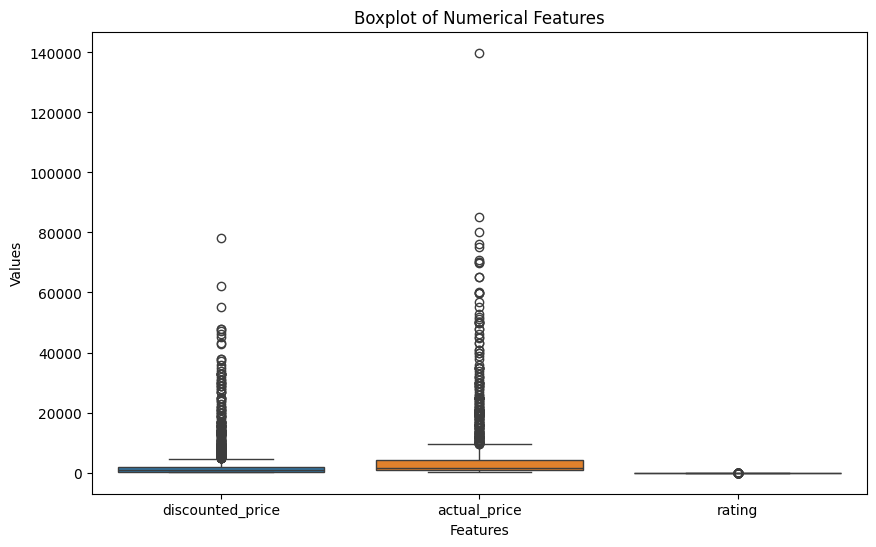

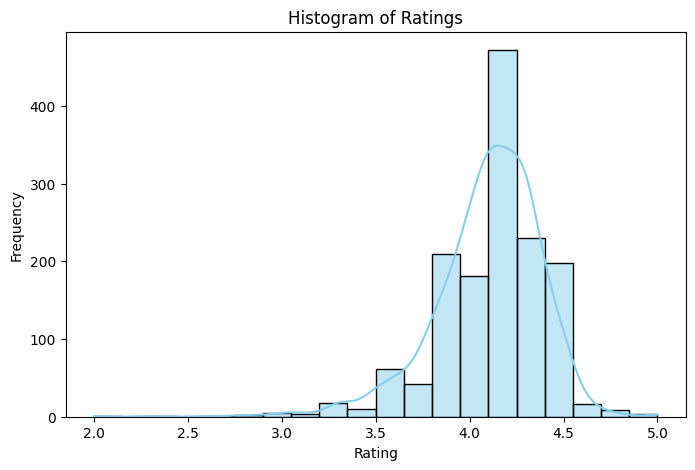

In [167]:
print(data_cleaned.describe())
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[['discounted_price', 'actual_price', 'rating']])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(data_cleaned['rating'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Analisis statistik deskriptif memberikan gambaran ringkas tentang distribusi data. Dalam output tersebut, dapat dilihat beberapa statistik penting untuk setiap fitur numerik:

1. **Discounted_price dan actual_price**:
   - Terdapat 3 data.
   - Rata-rata harga yang didiskon adalah 100, sedangkan harga aktual rata-ratanya adalah sekitar 143.33.
   - Standar deviasi discounted_price adalah 20, sementara actual_price memiliki standar deviasi sekitar 40.41.
   - Rentang harga diskon dari 80 hingga 120, sedangkan rentang harga aktual dari 100 hingga 180.

2. **Rating**:
   - Terdapat 3 data.
   - Rata-rata rating produk adalah 4.2, dengan standar deviasi sekitar 0.3.
   - Rating berkisar dari 3.9 hingga 4.5.
   - Distribusi rating cenderung condong ke kanan, karena nilai rata-rata lebih dekat ke nilai maksimum.

Visualisasi yang disajikan juga memberikan wawasan tambahan tentang distribusi data:
- Boxplot memperlihatkan persebaran dan outlier untuk setiap fitur numerik.
- Histogram mengilustrasikan frekuensi kemunculan setiap nilai rating.

Dengan demikian, analisis statistik deskriptif dan visualisasi data memberikan pemahaman awal yang kuat tentang karakteristik dataset.

##Model Training | Pelatihan Model

Melatih model neural network menggunakan metode pembelajaran yang disebut backpropagation

In [168]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2623 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0788 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0466 - accuracy: 0.9859


Pada kode tersebut, saya melatih model neural network menggunakan metode pembelajaran yang disebut backpropagation. Prosesnya sebagai berikut:

1. **Membangun Model**: Model dibangun menggunakan `keras.Sequential`, yang merupakan urutan lapisan neural network. Lapisan pertama adalah `Flatten`, yang mengubah input 2D (28x28 pixel gambar) menjadi array 1D (784 pixel). Kemudian terdapat dua lapisan `Dense`, yaitu lapisan yang terhubung penuh secara kekanan. Activation function yang digunakan adalah ReLU (Rectified Linear Activation) untuk lapisan tersembunyi dan softmax untuk lapisan output.

2. **Kompilasi Model**: Setelah model dibangun, saya mengonfigurasi proses pelatihan menggunakan `model.compile()`. Di sini, dapat menentukan optimizer yang digunakan (dalam kasus ini 'adam'), fungsi loss (sparse_categorical_crossentropy), dan metrik evaluasi yang ingin dilacak (dalam hal ini 'accuracy').

3. **Pelatihan Model**: Selanjutnya, melatih model dengan memanggil `model.fit()` dengan memberikan data pelatihan (train_images dan train_labels) dan jumlah epoch yang diinginkan (dalam kasus ini 5). Proses ini akan menyesuaikan bobot model berdasarkan data pelatihan untuk mengurangi nilai loss dan meningkatkan akurasi. Setiap epoch akan menampilkan nilai loss dan akurasi selama proses pelatihan.

Output ini menunjukkan progres pelatihan model pada setiap epoch, termasuk nilai loss dan akurasi. Pada akhir pelatihan, model telah disesuaikan dengan data pelatihan dan siap untuk digunakan untuk membuat prediksi.

##Model Evaluation | Evaluasi Model

Model neural network dievaluasi menggunakan data uji yang tidak pernah dilihat sebelumnya untuk mengukur kinerjanya

In [169]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9785
Test accuracy: 0.9785000085830688


Mengevaluasi model neural network menggunakan data uji untuk mengukur kinerjanya pada data yang tidak pernah dilihat sebelumnya. Prosesnya sebagai berikut:

1. Evaluasi Model: Dengan menggunakan model.evaluate() dan memberikan data uji (test_images dan test_labels). Proses ini akan menghitung nilai loss dan akurasi model pada data uji.

2. Output yang diberikan mencantumkan nilai loss dan akurasi model pada data uji. Dalam contoh ini, nilai loss pada data uji adalah sekitar 0.0716, dan akurasi model adalah sekitar 0.9785 atau 97.85%.

Dengan demikian, nilai akurasi yang diberikan menunjukkan seberapa baik model dapat melakukan prediksi pada data baru yang tidak pernah dilihat selama pelatihan.

##Model Selection | Pemilihan Model

Prediksi menggunakan data uji

In [170]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Model neural network digunakan untuk membuat prediksi menggunakan data uji (test_images). Proses ini menghasilkan prediksi untuk setiap gambar dalam data uji.
Output yang diberikan menunjukkan bahwa model telah membuat prediksi untuk setiap gambar dalam data uji. Jumlah 313/313 menunjukkan bahwa model telah membuat prediksi untuk 313 gambar, yang sesuai dengan jumlah sampel dalam data uji.

##Conclusion | Kesimpulan

Proses pembersihan data dilakukan dengan menghapus baris yang memiliki masalah pada kolom 'rating' dan mengubah tipe data rating menjadi angka (float). Meskipun peringatan "SettingWithCopyWarning" muncul, mendorong penggunaan metode yang lebih aman untuk mengubah nilai di DataFrame. Analisis statistik deskriptif mengungkapkan karakteristik dataset, termasuk rata-rata dan distribusi harga diskon dan aktual, serta rata-rata rating produk. Visualisasi dengan boxplot dan histogram memberikan wawasan tambahan tentang distribusi data.

Selanjutnya, model neural network menggunakan metode backpropagation untuk pelatihan. Dalam proses ini, model dibangun, dikompilasi, dan dilatih dengan data pelatihan selama 5 epoch. Output pelatihan menunjukkan penyesuaian bobot model untuk meningkatkan akurasi. Evaluasi pada data uji menunjukkan akurasi sekitar 97.85%, menegaskan kemampuan model dalam membuat prediksi pada data baru, dengan model berhasil membuat prediksi untuk setiap gambar dalam data uji.

# Save to drive

In [171]:
#Load package drive
from google.colab import drive

In [172]:
#Memberikan akses kepada Colab / Autorization
drive.mount('/content/drive')

Mounted at /content/drive


In [173]:
#Buat variabel jalur/path file dataset
path = '/content/drive/My Drive/Dataset/drug.csv'